In [1]:
#Description: Predicting the future price of the S&P500
#import the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import yfinance as yf
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [2]:
#load the data
df=yf.download('^GSPC',start='2010-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,1126.599976,1127.640015,1114.810059,1115.099976,1115.099976,2076990000
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
...,...,...,...,...,...,...
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000
2023-01-10,3888.570068,3919.830078,3877.290039,3919.250000,3919.250000,3851030000
2023-01-11,3932.350098,3970.070068,3928.540039,3969.610107,3969.610107,4303360000


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,1126.599976,1127.640015,1114.810059,1115.099976,1115.099976,2076990000
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
...,...,...,...,...,...,...
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000
2023-01-10,3888.570068,3919.830078,3877.290039,3919.250000,3919.250000,3851030000
2023-01-11,3932.350098,3970.070068,3928.540039,3969.610107,3969.610107,4303360000


In [4]:
#Plot the linear regression line and the close price
df3=df.copy()
#Create a new column called 'Numbers' that ranges  to the length of the data set
df3['Numbers']=list(range(0,len(df3)))
#Store the 'Number' columns into a variable called 'x' as an array
X=np.array(df3[['Numbers']])
#store the close price as an array in a variable called 'y'
y=df3['Close'].values
#create and train the model
lin_model=LinearRegression().fit(X,y)
print('Intercept: ',lin_model.intercept_)
print('Slope: ',lin_model.coef_)           

Intercept:  762.6835839151477
Slope:  [1.00123917]


Text(0.5, 1.0, 'Close Price History')

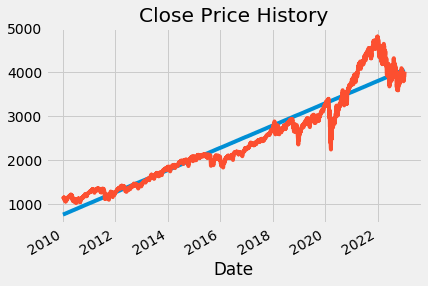

In [5]:
#Predict the data for visualization
#Get the predicted from the model and store them into a variable called 'y_pred'
y_pred=lin_model.coef_* X+lin_model.intercept_ #y = mx+b
#Store the predicted values in a new column called 'Pred'
df3['Pred']=y_pred
#plot the data
df3['Pred'].plot()
df3['Close'].plot()
plt.title('Close Price History')

In [6]:
#Goodness of the fit ?
r2_score(df3['Close'],df3['Pred'])#the best possible Score is 1

0.9168848985098217

In [7]:
#Show the possible price for the next day based on the model
lin_model.coef_*len(df3)+1+lin_model.intercept_

array([4049.75055508])